In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [76]:
data = pd.read_csv("/Users/abhishekkanade/Documents/notebook/My_Project/AICTE_IBM_Internshipe(Edunet)/adult 3.csv")

In [77]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [79]:
data.shape

(48842, 15)

In [80]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [81]:
data.drop(columns=['capital-gain','capital-loss'],inplace=True)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'educational-num'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

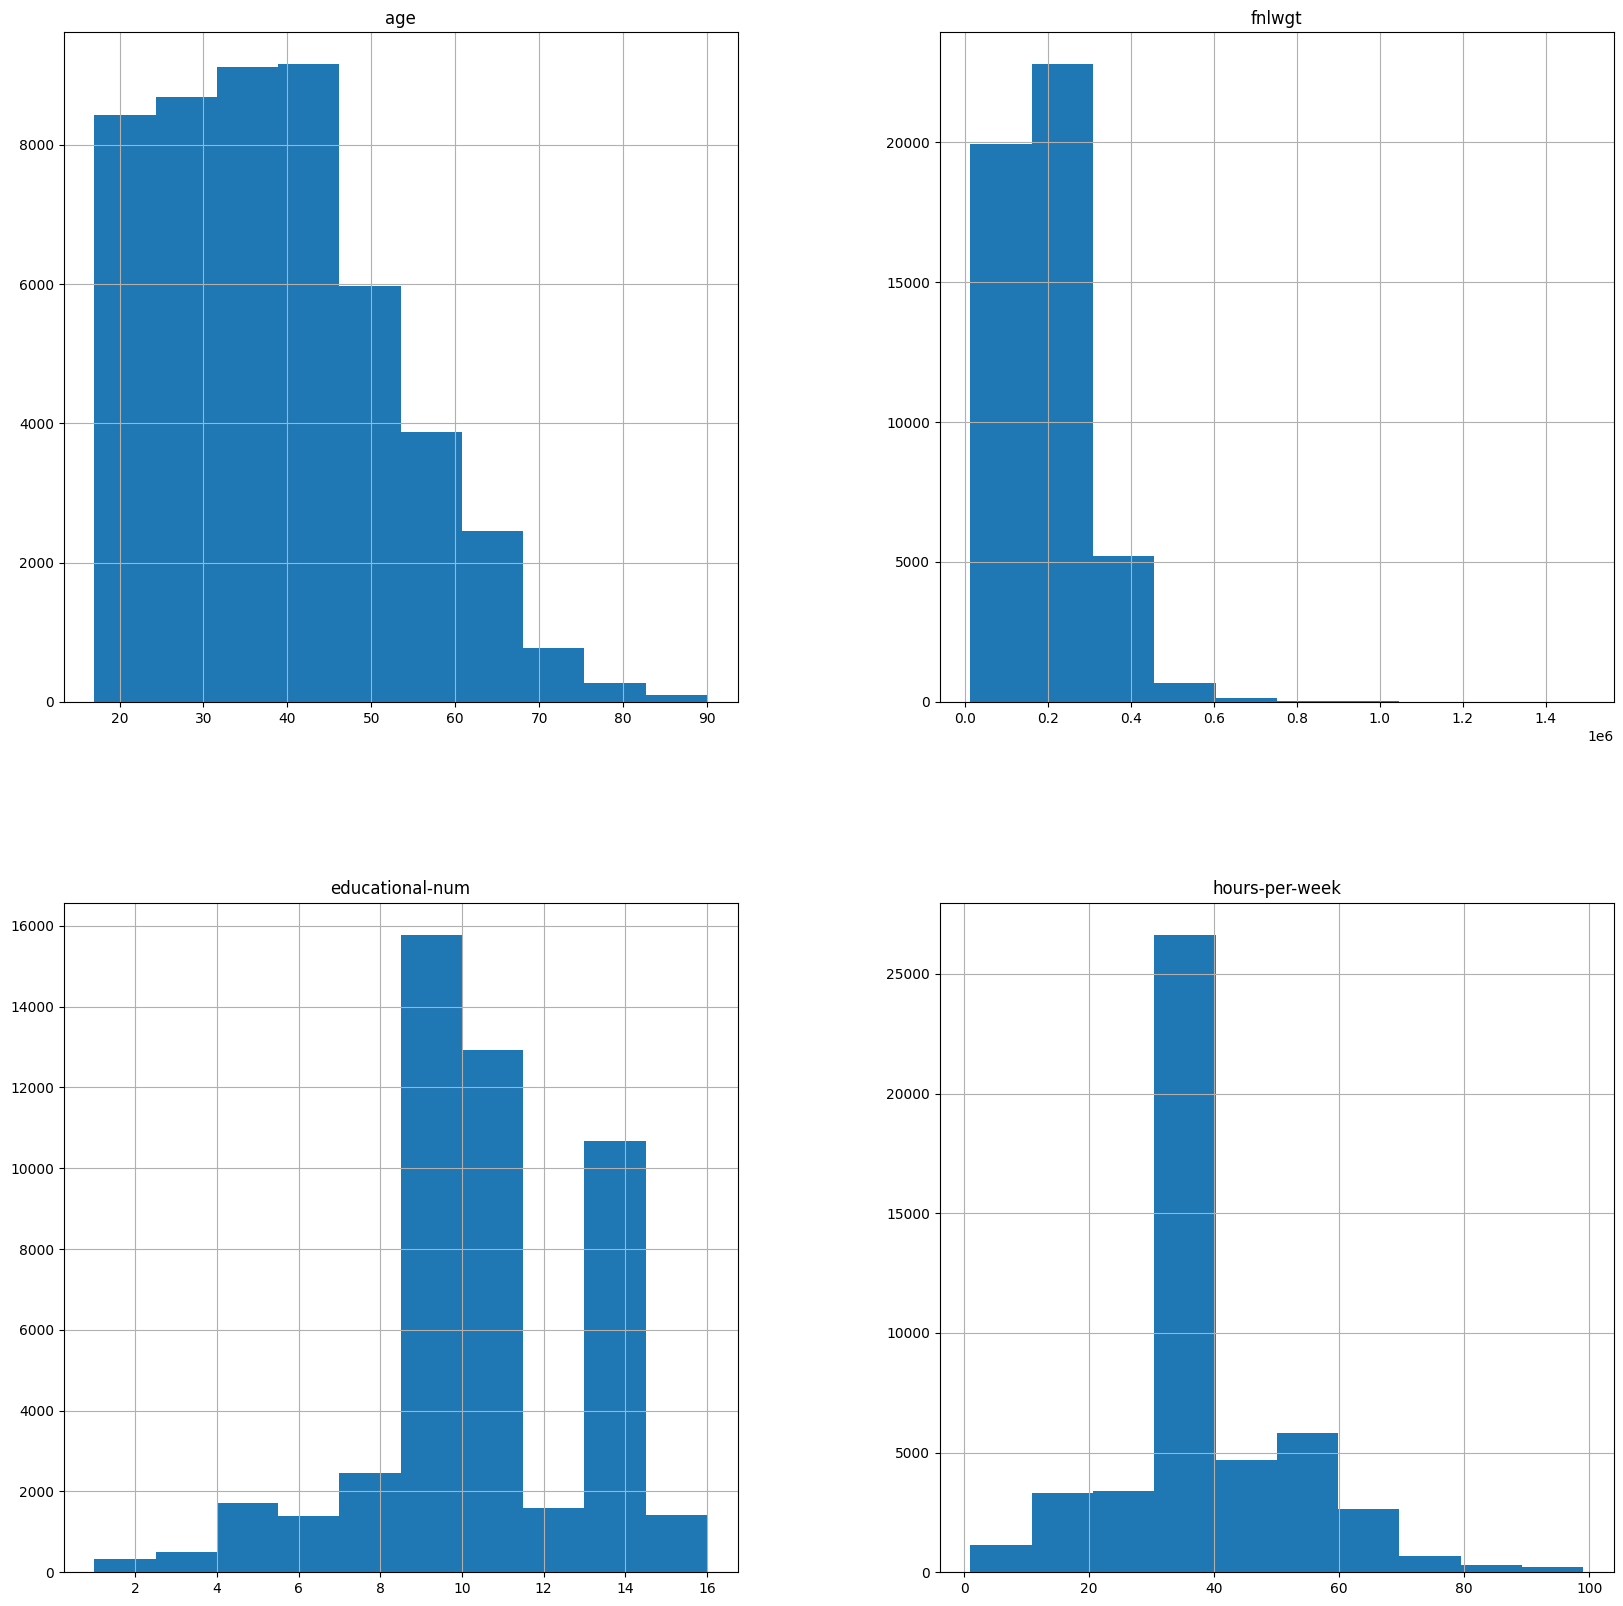

In [82]:
data.hist(figsize=(20,20))

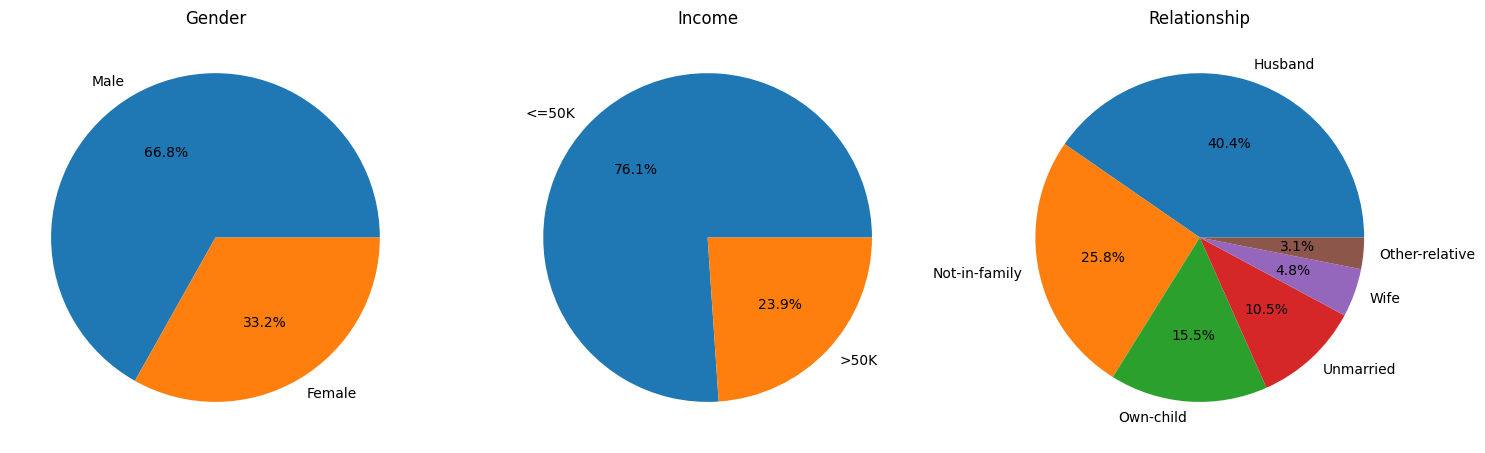

In [83]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(['gender', 'income', 'relationship']):
    ax[i].pie(data[col].value_counts(), labels=data[col].value_counts().index, autopct='%1.1f%%')
    ax[i].set_title(f'{col.capitalize()}')
plt.tight_layout()
plt.show()


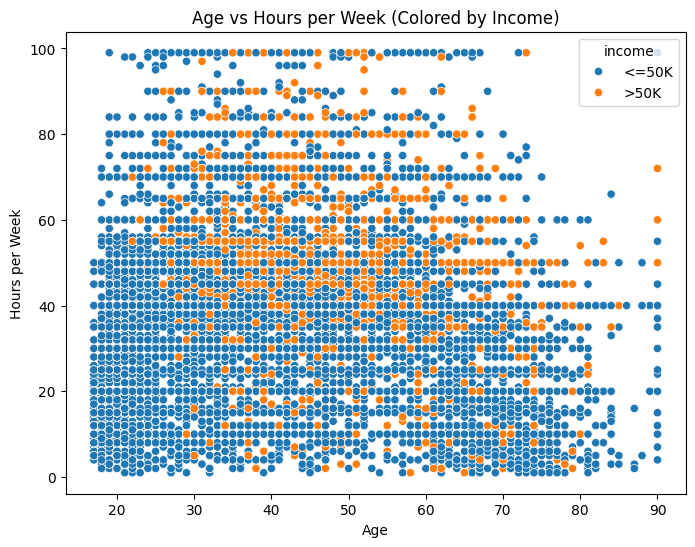

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='age', y='hours-per-week', hue='income')
plt.title('Age vs Hours per Week (Colored by Income)')
plt.xlabel('Age')
plt.ylabel('Hours per Week')
plt.show()


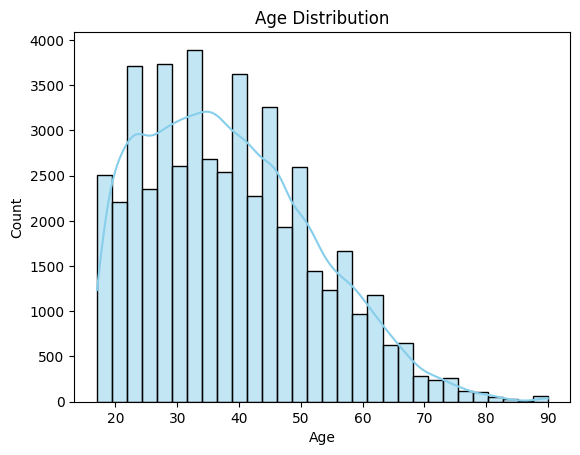

In [85]:
sns.histplot(data['age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


/var/folders/36/9bqbb6vx74ddlfdt031cqj2c0000gn/T/ipykernel_2753/2071863942.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='education', data=data, order=data['education'].value_counts().index, palette='pastel')


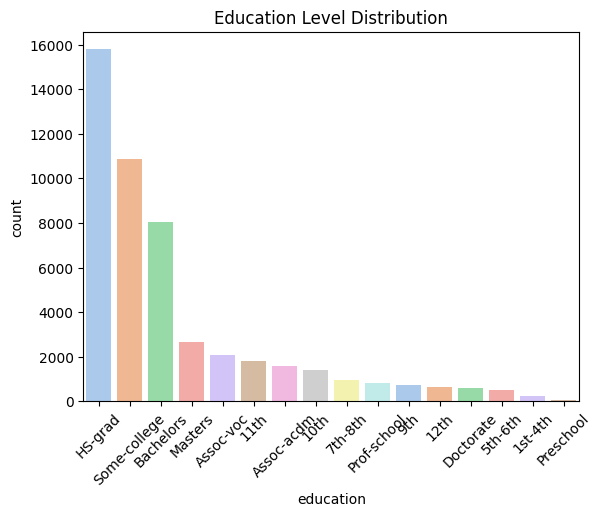

In [86]:
sns.countplot(x='education', data=data, order=data['education'].value_counts().index, palette='pastel')
plt.xticks(rotation=45)
plt.title('Education Level Distribution')
plt.show()


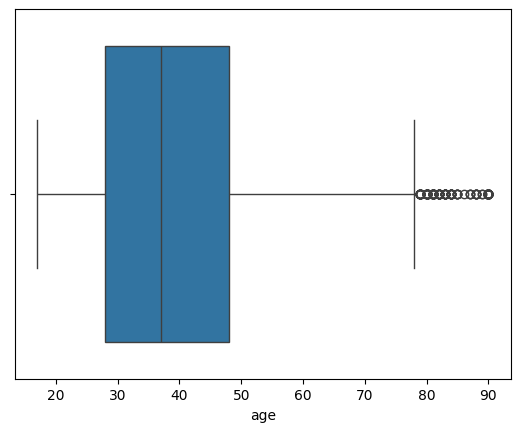

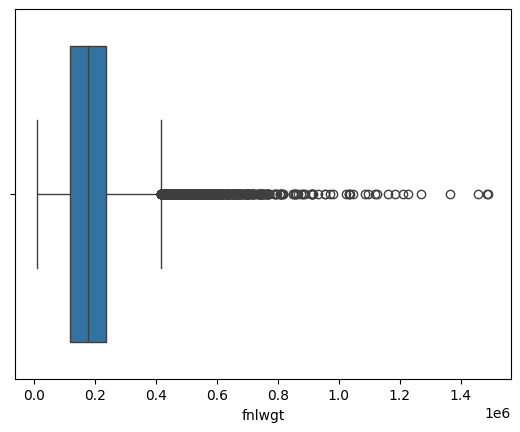

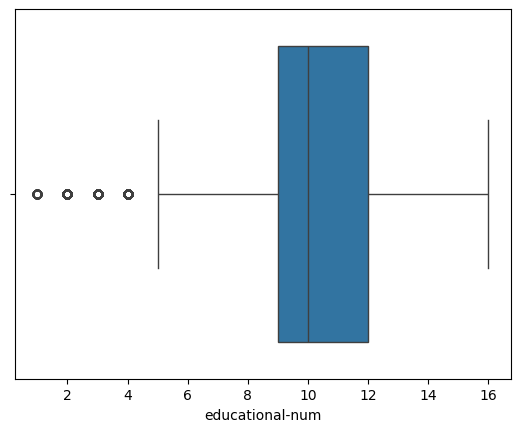

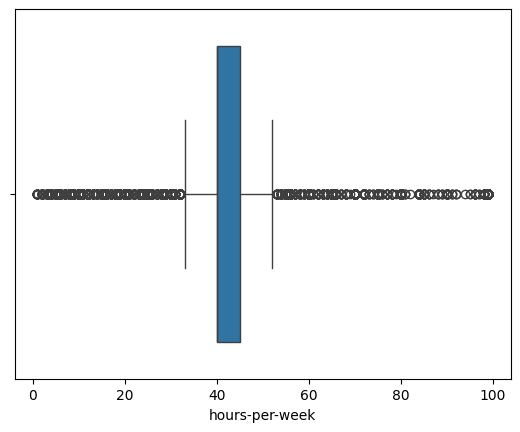

In [87]:
for col in data.columns:
  if data[col].dtype!='object':
    sns.boxplot(x=data[col])
    plt.show()

<Axes: xlabel='age'>

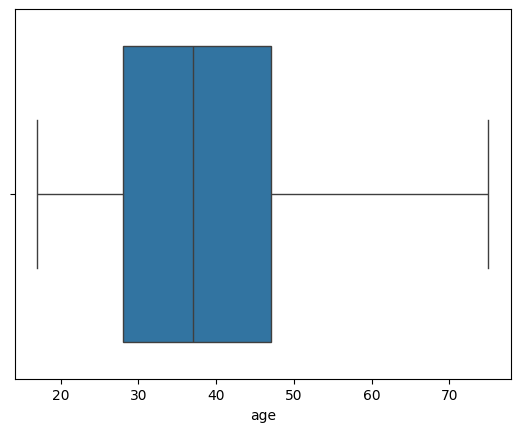

In [88]:
data = data[(data['age']<=75)&(data['age']>=17)]
sns.boxplot(x=data['age'])

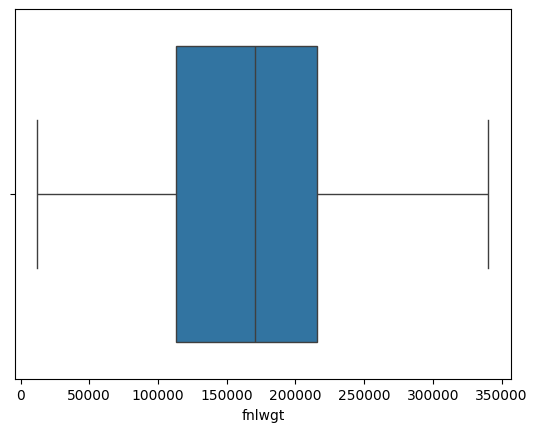

In [89]:
Q1 = data['fnlwgt'].quantile(0.25)
Q3 = data['fnlwgt'].quantile(0.65)
IQR = Q3 - Q1

# Define the bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data
data = data[(data['fnlwgt'] >= lower_bound) & (data['fnlwgt'] <= upper_bound)]

# Optional: Re-plot after removing outliers
sns.boxplot(x=data['fnlwgt'])
plt.show()


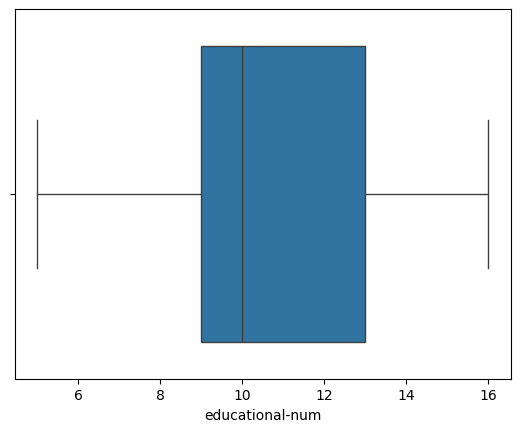

In [90]:
Q1 = data['educational-num'].quantile(0.25)
Q3 = data['educational-num'].quantile(0.75)
IQR = Q3 - Q1

# Calculate bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data
data = data[(data['educational-num'] >= lower_bound) & (data['educational-num'] <= upper_bound)]

# Optional: Replot to confirm outliers are removed
sns.boxplot(x=data['educational-num'])
plt.show()


In [91]:
Q1 = data['hours-per-week'].quantile(0.25)
Q3 = data['hours-per-week'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Cap values outside bounds
data['hours-per-week'] = data['hours-per-week'].clip(lower, upper)


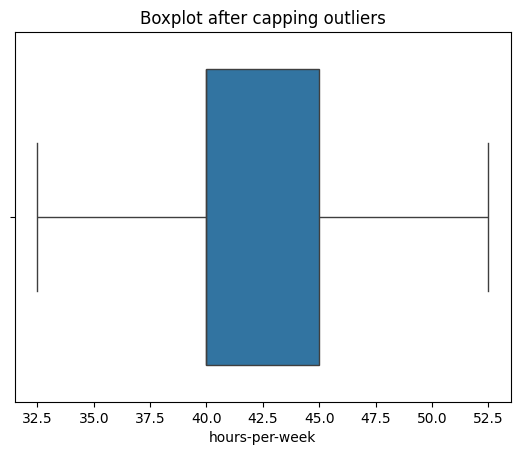

In [92]:

sns.boxplot(x=data['hours-per-week'])
plt.title("Boxplot after capping outliers")
plt.show()


In [93]:
# in the above code 'without-pay and 'never-worked' having very less count as well as they are not earning
# so not required for income prediction
# so we can remove such data
data=data[data['workclass']!='Without-pay']
data=data[data['workclass']!='Never-worked']

In [94]:
# here also we can eliminate some categories like '1st-4th','5th-6th','Preschool'
data=data[data['education']!='1st-4th']
data=data[data['education']!='5th-6th']
data=data[data['education']!='Preschool']

In [95]:
# now the 'education' and 'education-num' are giving us same information so we will keep only one of them
# here i will remove the text data column 'education'
data.drop(columns=['education'],inplace=True)
data.columns

Index(['age', 'workclass', 'fnlwgt', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')

In [96]:
data.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40.0,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50.0,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40.0,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40.0,United-States,>50K
4,18,?,103497,10,Never-married,?,Own-child,White,Female,32.5,United-States,<=50K


In [103]:
for col in data.select_dtypes(include=['object', 'category', 'string']).columns:
    print(f"\nColumn: {col}")
    print(data[col].value_counts())



Column: workclass
workclass
Private             29653
Self-emp-not-inc     3339
Local-gov            2833
others               2313
State-gov            1783
Self-emp-inc         1540
Federal-gov          1273
Name: count, dtype: int64

Column: marital-status
marital-status
Married-civ-spouse       19525
Never-married            14207
Divorced                  5966
Separated                 1297
Widowed                   1209
Married-spouse-absent      499
Married-AF-spouse           31
Name: count, dtype: int64

Column: occupation
occupation
Prof-specialty       5614
Exec-managerial      5525
Craft-repair         5288
Adm-clerical         5044
Sales                4948
Other-service        4185
Machine-op-inspct    2546
others               2313
Transport-moving     2015
Handlers-cleaners    1719
Tech-support         1307
Farming-fishing      1168
Protective-serv       882
Priv-house-serv       166
Armed-Forces           14
Name: count, dtype: int64

Column: relationship
relationship

In [102]:
data.workclass.replace({'?':'others'},inplace=True)

/var/folders/36/9bqbb6vx74ddlfdt031cqj2c0000gn/T/ipykernel_2753/3308181106.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.workclass.replace({'?':'others'},inplace=True)


In [99]:
data.occupation.replace({'?':'others'},inplace=True)

In [104]:
data['native-country'].replace({'?': 'others'}, inplace=True)


In [105]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [106]:
from sklearn.preprocessing import LabelEncoder   #import libarary
categorical_columns = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


In [107]:
data.head(100)

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,2,226802,7,4,6,3,2,1,40.0,38,<=50K
1,38,2,89814,9,2,4,0,4,1,50.0,38,<=50K
2,28,1,336951,12,2,10,0,4,1,40.0,38,>50K
3,44,2,160323,10,2,6,0,2,1,40.0,38,>50K
4,18,6,103497,10,4,14,3,4,0,32.5,38,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
110,18,2,179020,9,4,6,3,4,0,48.0,38,<=50K
111,28,2,149624,10,2,2,0,4,1,40.0,38,<=50K
112,29,2,337266,11,2,3,0,4,1,40.0,38,>50K
113,20,6,30796,9,4,14,3,4,0,32.5,38,<=50K


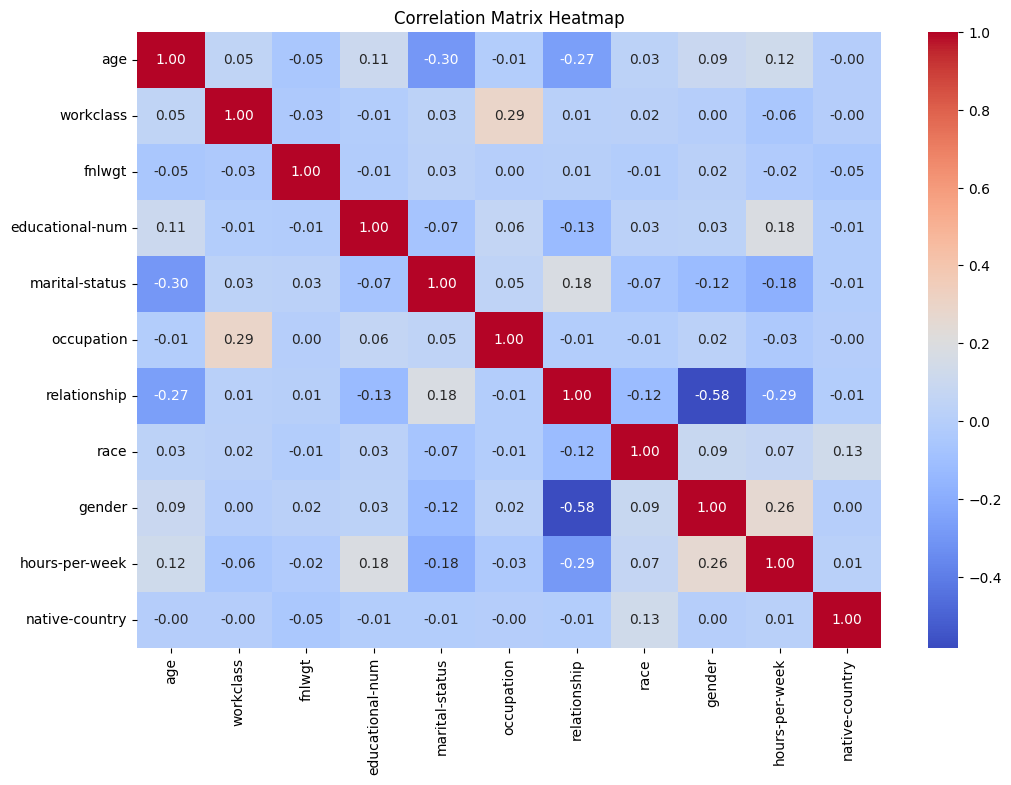

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_data=data.drop(columns=['income'])
corr_matrix = corr_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Split features and target
x = data.drop(columns=['income'])
y = data['income']

# Split into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train model

models={
    'DecisionTreeClassifier':DecisionTreeClassifier(max_depth=10),
    'MLPClassifier':MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=100),
    'RandomForestClassifier':RandomForestClassifier(n_estimators=100,n_jobs=1),
    'LogisticRegression':LogisticRegression(),
    'GaussianNB':GaussianNB()
}
# Train models
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")

DecisionTreeClassifier Accuracy: 0.8243828243828244
MLPClassifier Accuracy: 0.755001755001755
RandomForestClassifier Accuracy: 0.8226278226278226
LogisticRegression Accuracy: 0.7402597402597403
GaussianNB Accuracy: 0.784017784017784


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Best model is DecisionTreeClassifier with Accuracy 82.5%


In [69]:
y_pred=models['DecisionTreeClassifier'].predict(x_test)
# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8243828243828244
Confusion Matrix:
 [[5942  511]
 [ 990 1104]]
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.86      0.92      0.89      6453
        >50K       0.68      0.53      0.60      2094

    accuracy                           0.82      8547
   macro avg       0.77      0.72      0.74      8547
weighted avg       0.81      0.82      0.82      8547



In [74]:
x_test.columns

Index(['age', 'workclass', 'fnlwgt', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country'],
      dtype='object')

# Save Model

In [109]:
import joblib
# Save the model
joblib.dump(models['DecisionTreeClassifier'], 'salary_prediction_model.pkl')    
joblib.dump(label_encoders, 'label_encoders.pkl')

['label_encoders.pkl']